### `Importing the main Libraries`

In [29]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib, missingno
import warnings
warnings.filterwarnings("ignore")
## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import  cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
# from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
from xgboost import XGBRegressor

### `Load the Dataset and Look at the big Picture`

In [3]:
## Read the CSV file using pandas
FILE_PATH_Train = os.path.join(os.getcwd(), 'train.csv')
df_train = pd.read_csv(FILE_PATH_Train)

## Show the Head of the DF
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* There are 79 feature columns. Using these features your model has to predict the house sale price indicated by the label column named `SalePrice`.

We will drop the `Id` column as it is not necessary for model training.

In [4]:
df_train = df_train.drop('Id', axis=1)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## Check some info about the Dataset to (see nulls and DataTypes)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
## Show some statistics about the Dataset
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
## Check the nulls
df_train.isna().sum(axis=0)  ## axis=0 -- by defualt

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

<Axes: >

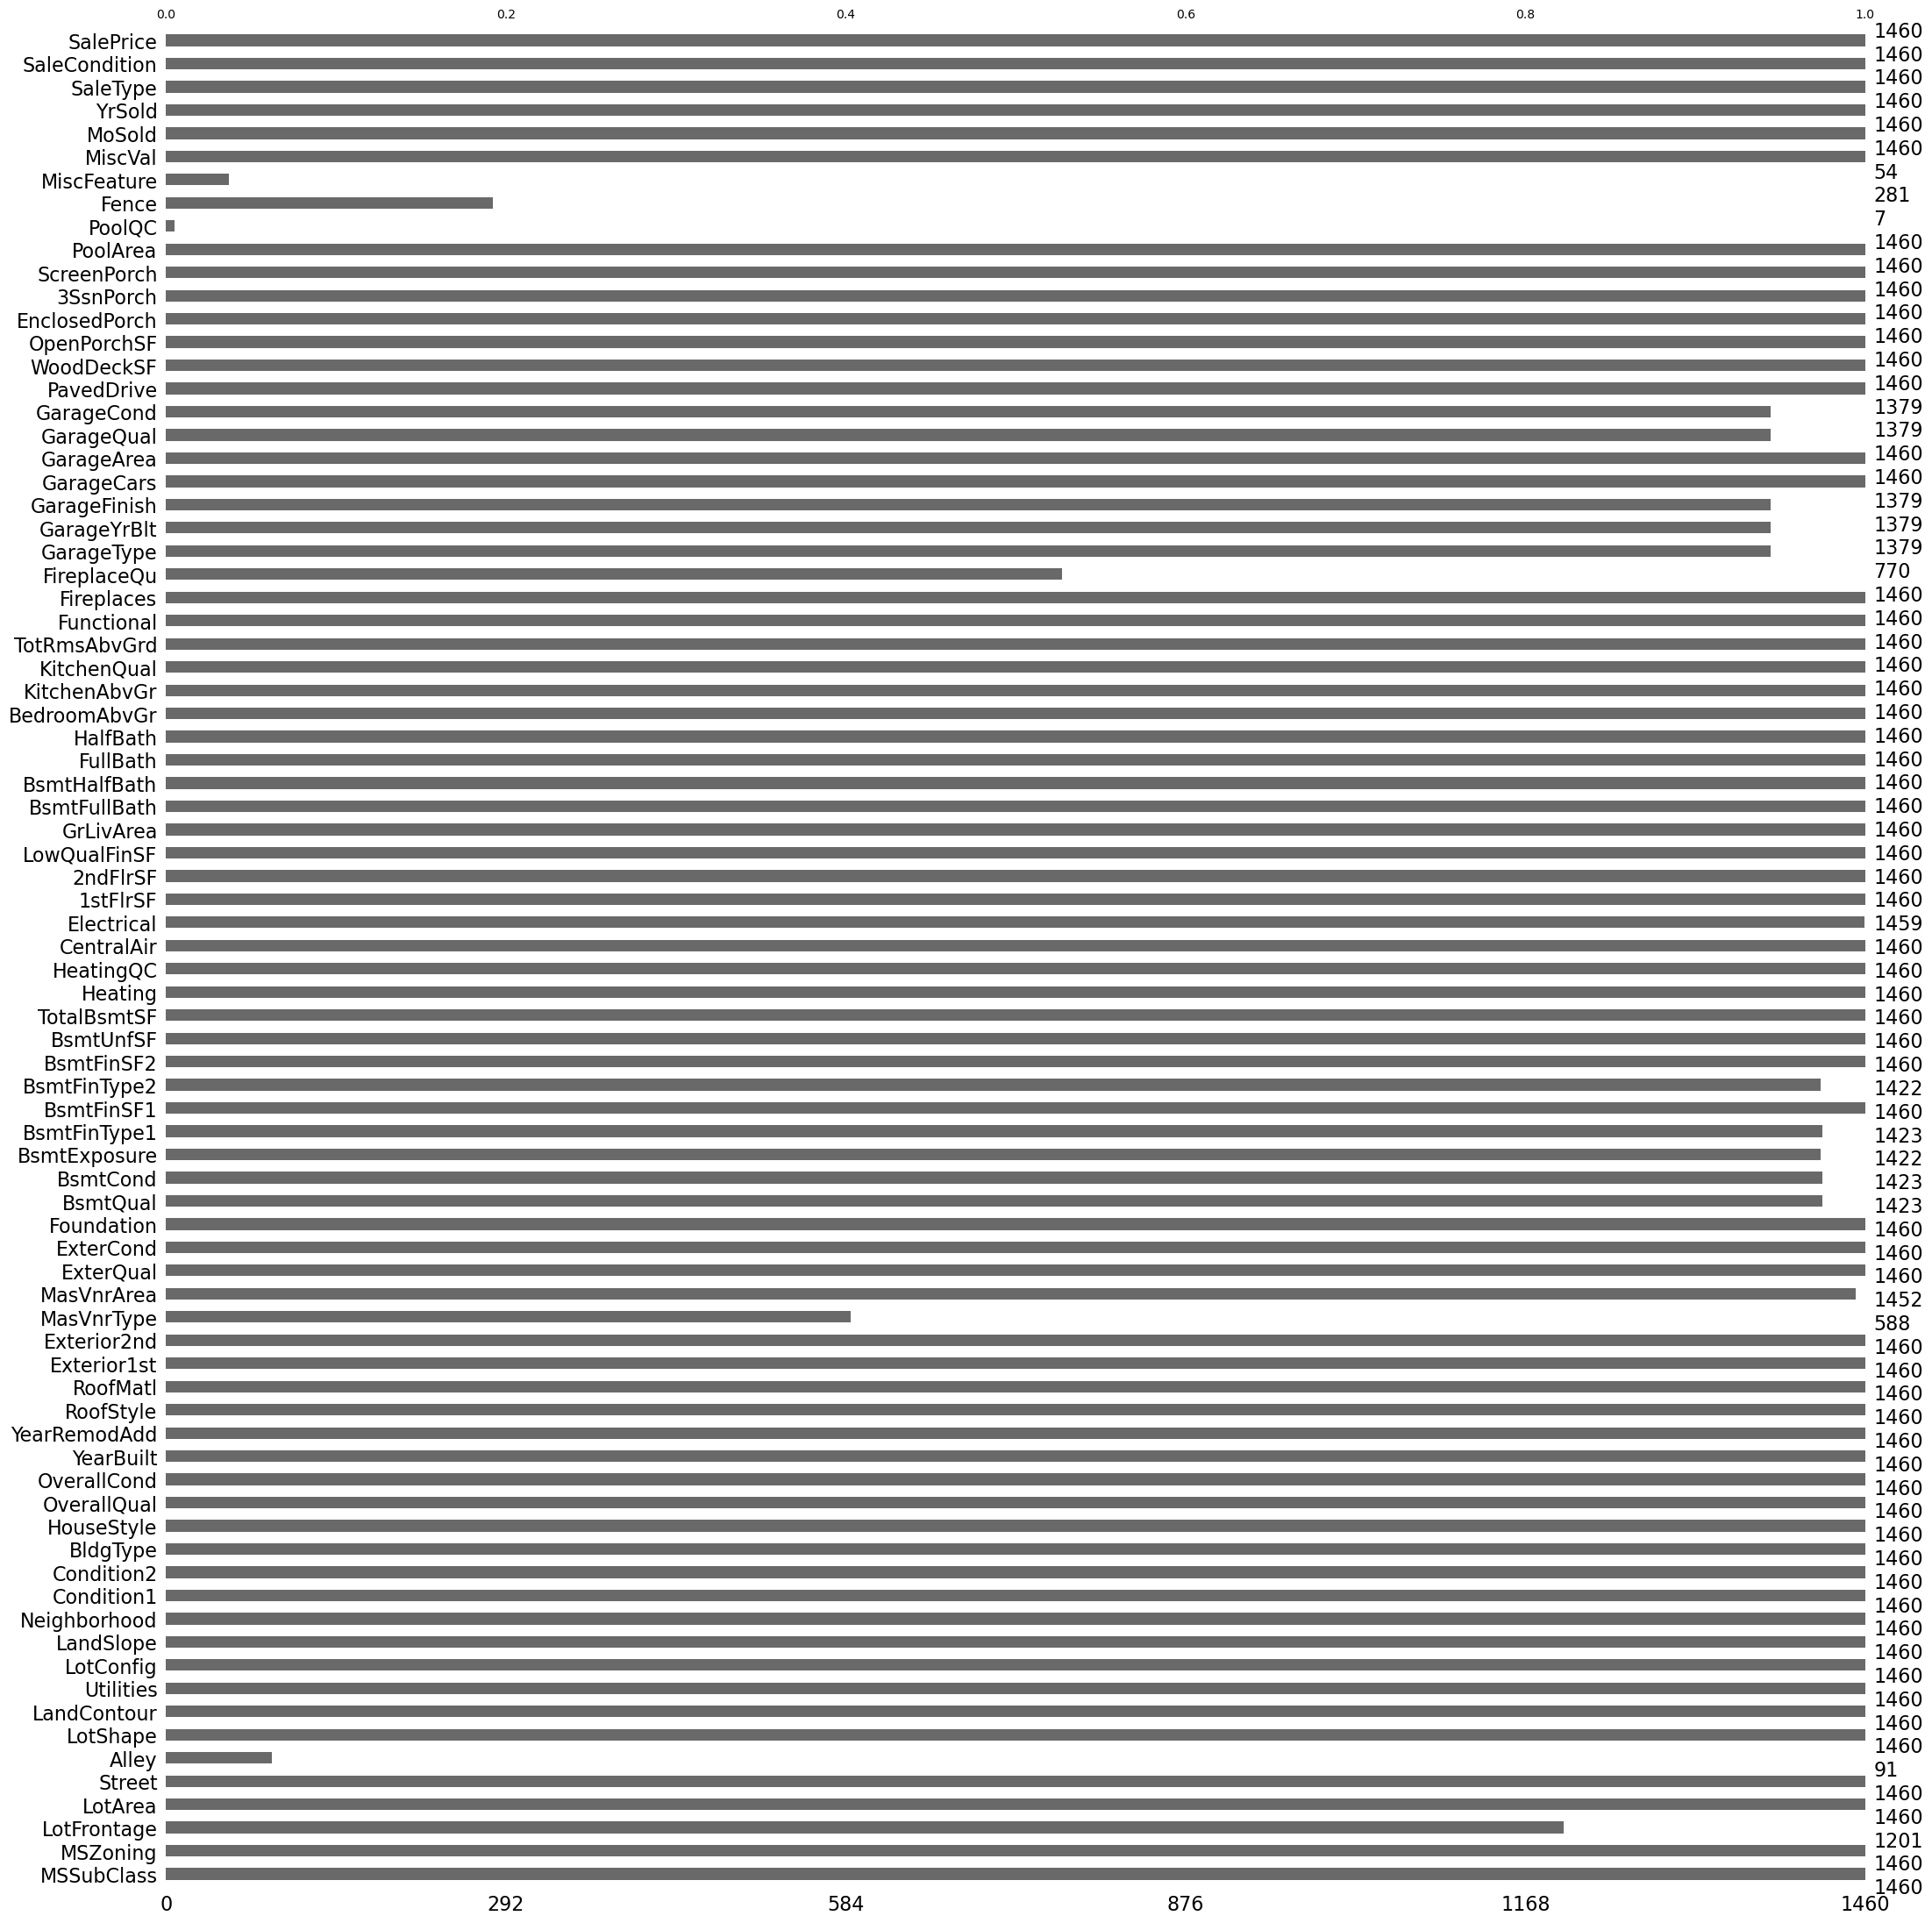

In [8]:
## check nulls using (missingno) library -- take care of the sum of above each bar
missingno.bar(df_train)

* > `Comment: It seems that Dataset is a contains 1460 instances and I found some null in alot of features 

----------------

### `Exploratory Data Analysis`

### `House Price Distribution`
Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


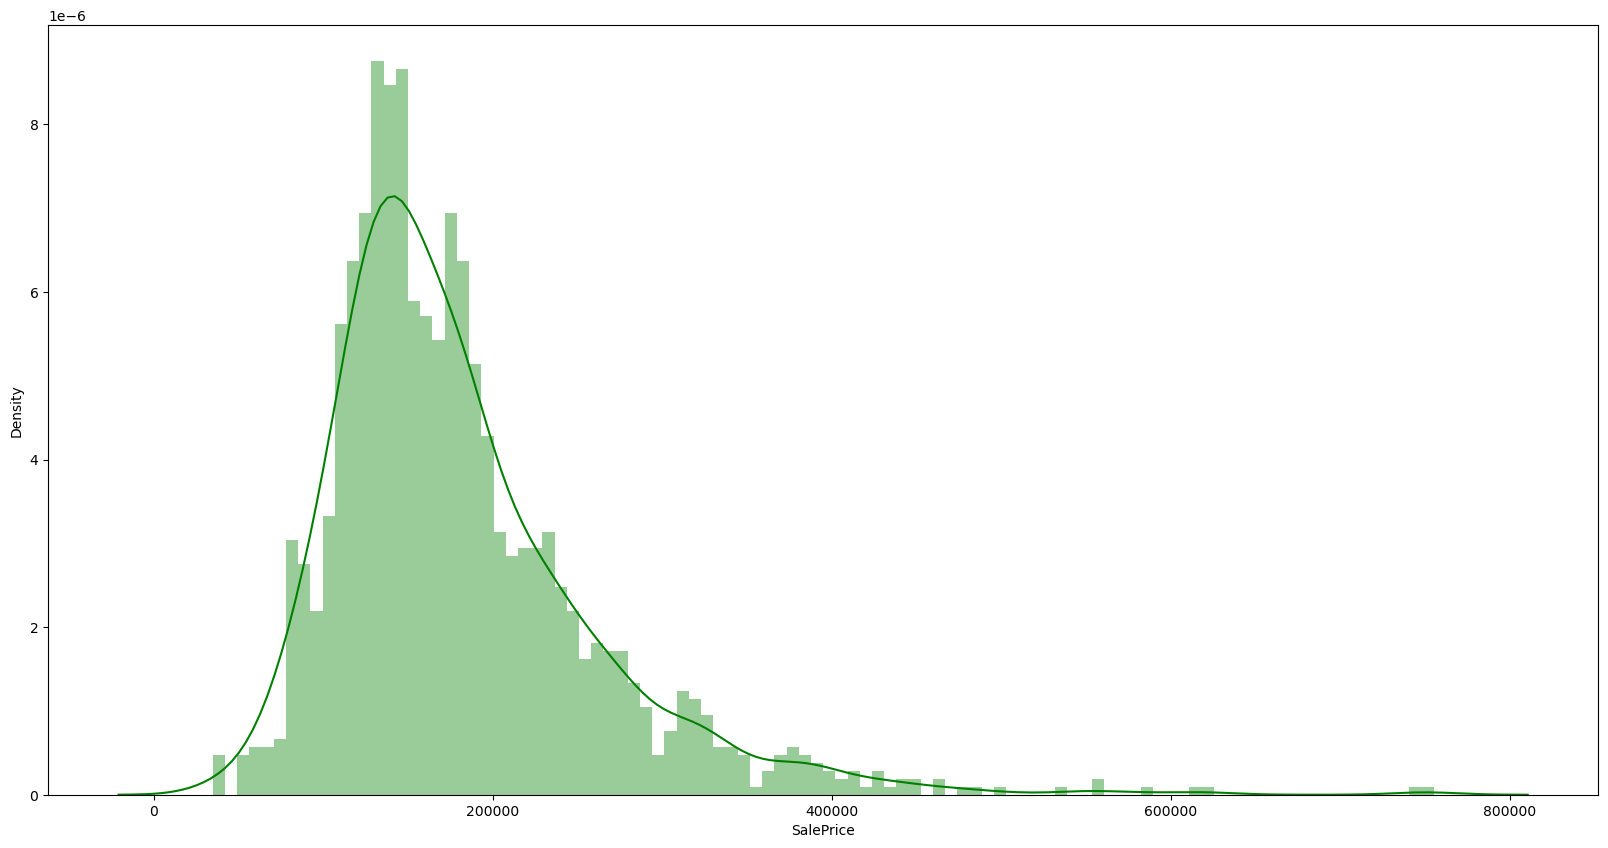

In [9]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()

### `Univariate Visualization`

## Numerical data distribution

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [10]:
list(set(df_train.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [11]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


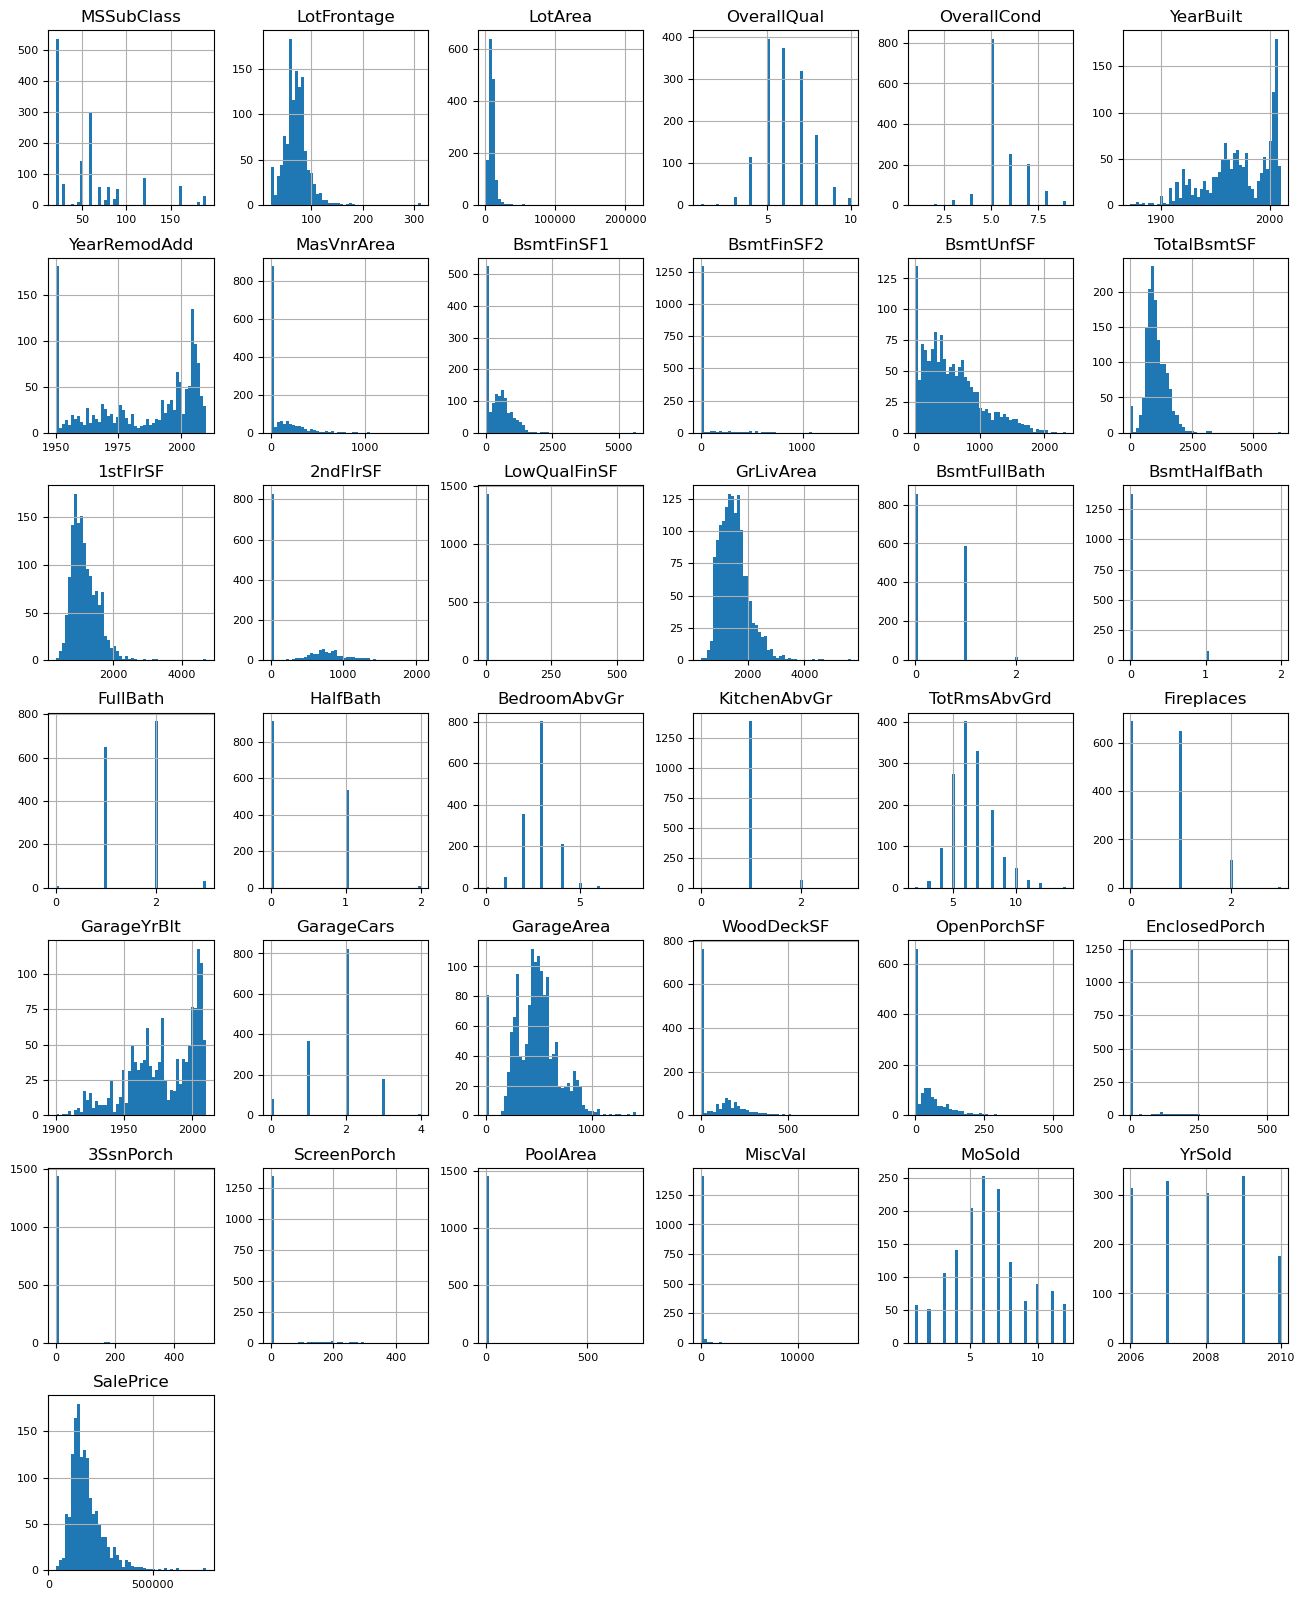

In [12]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

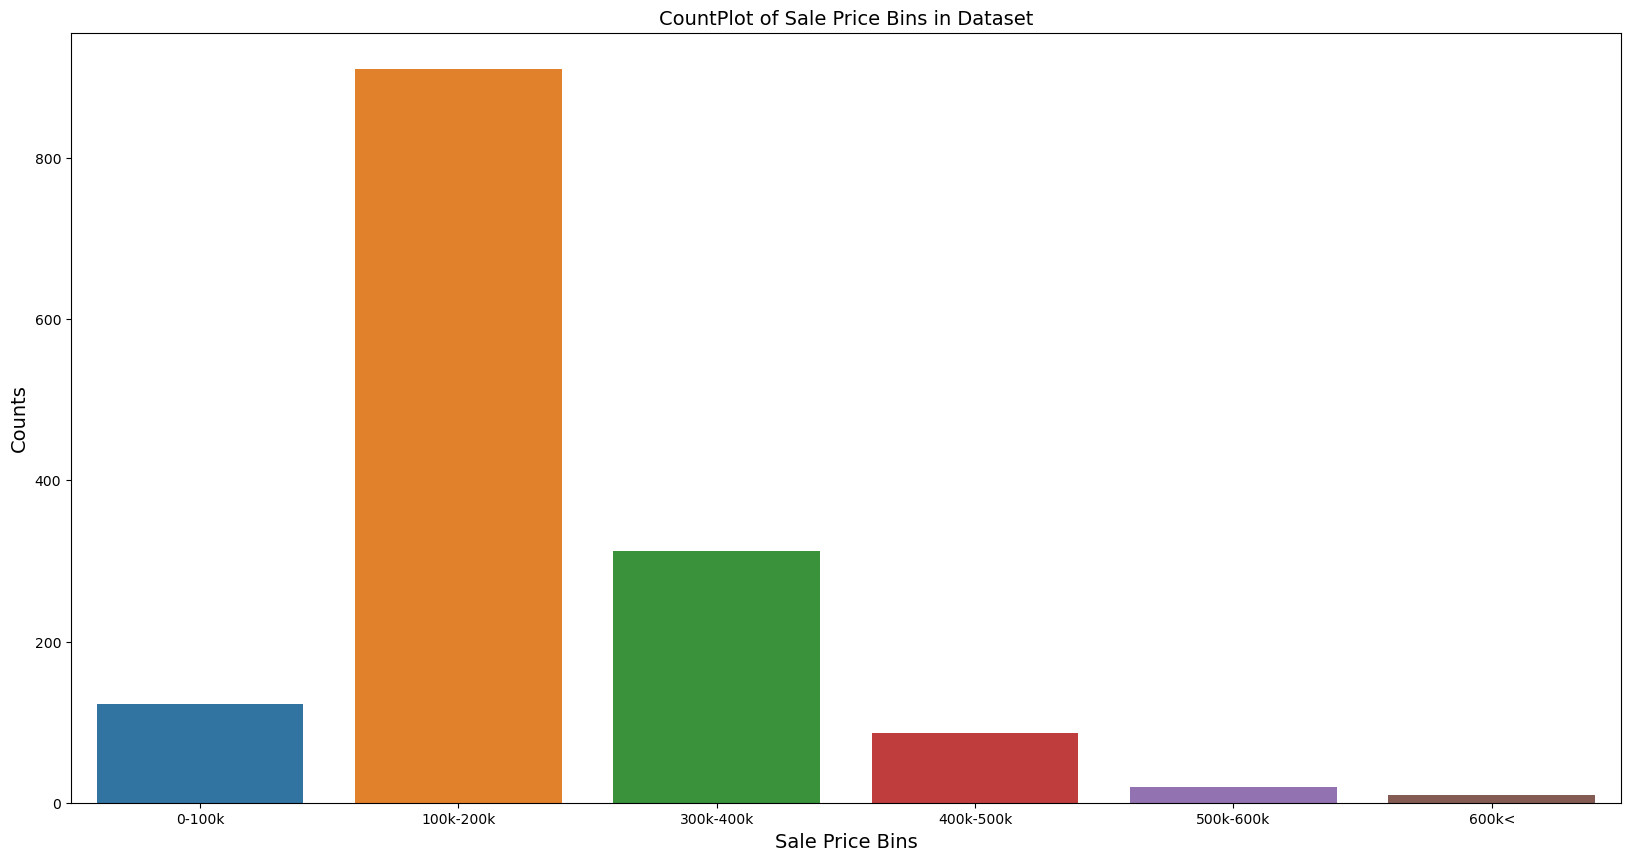

In [13]:
## Try for (SalePrice) to convert it into chunks (bins)
## Cut this Numerical Feature to Categorical One 
## Ex: for the following example -- any value between range (0-100k) will be the same category (like histogram)

sale_price_bins = pd.cut(x=df_train['SalePrice'], 
                          bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])


## Countplot for the above chunks
plt.figure(figsize=(20, 10))
sns.countplot(x=sale_price_bins)
plt.title('CountPlot of Sale Price Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Sale Price Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

* > `Comment: 

### `Bivariate Visualization`

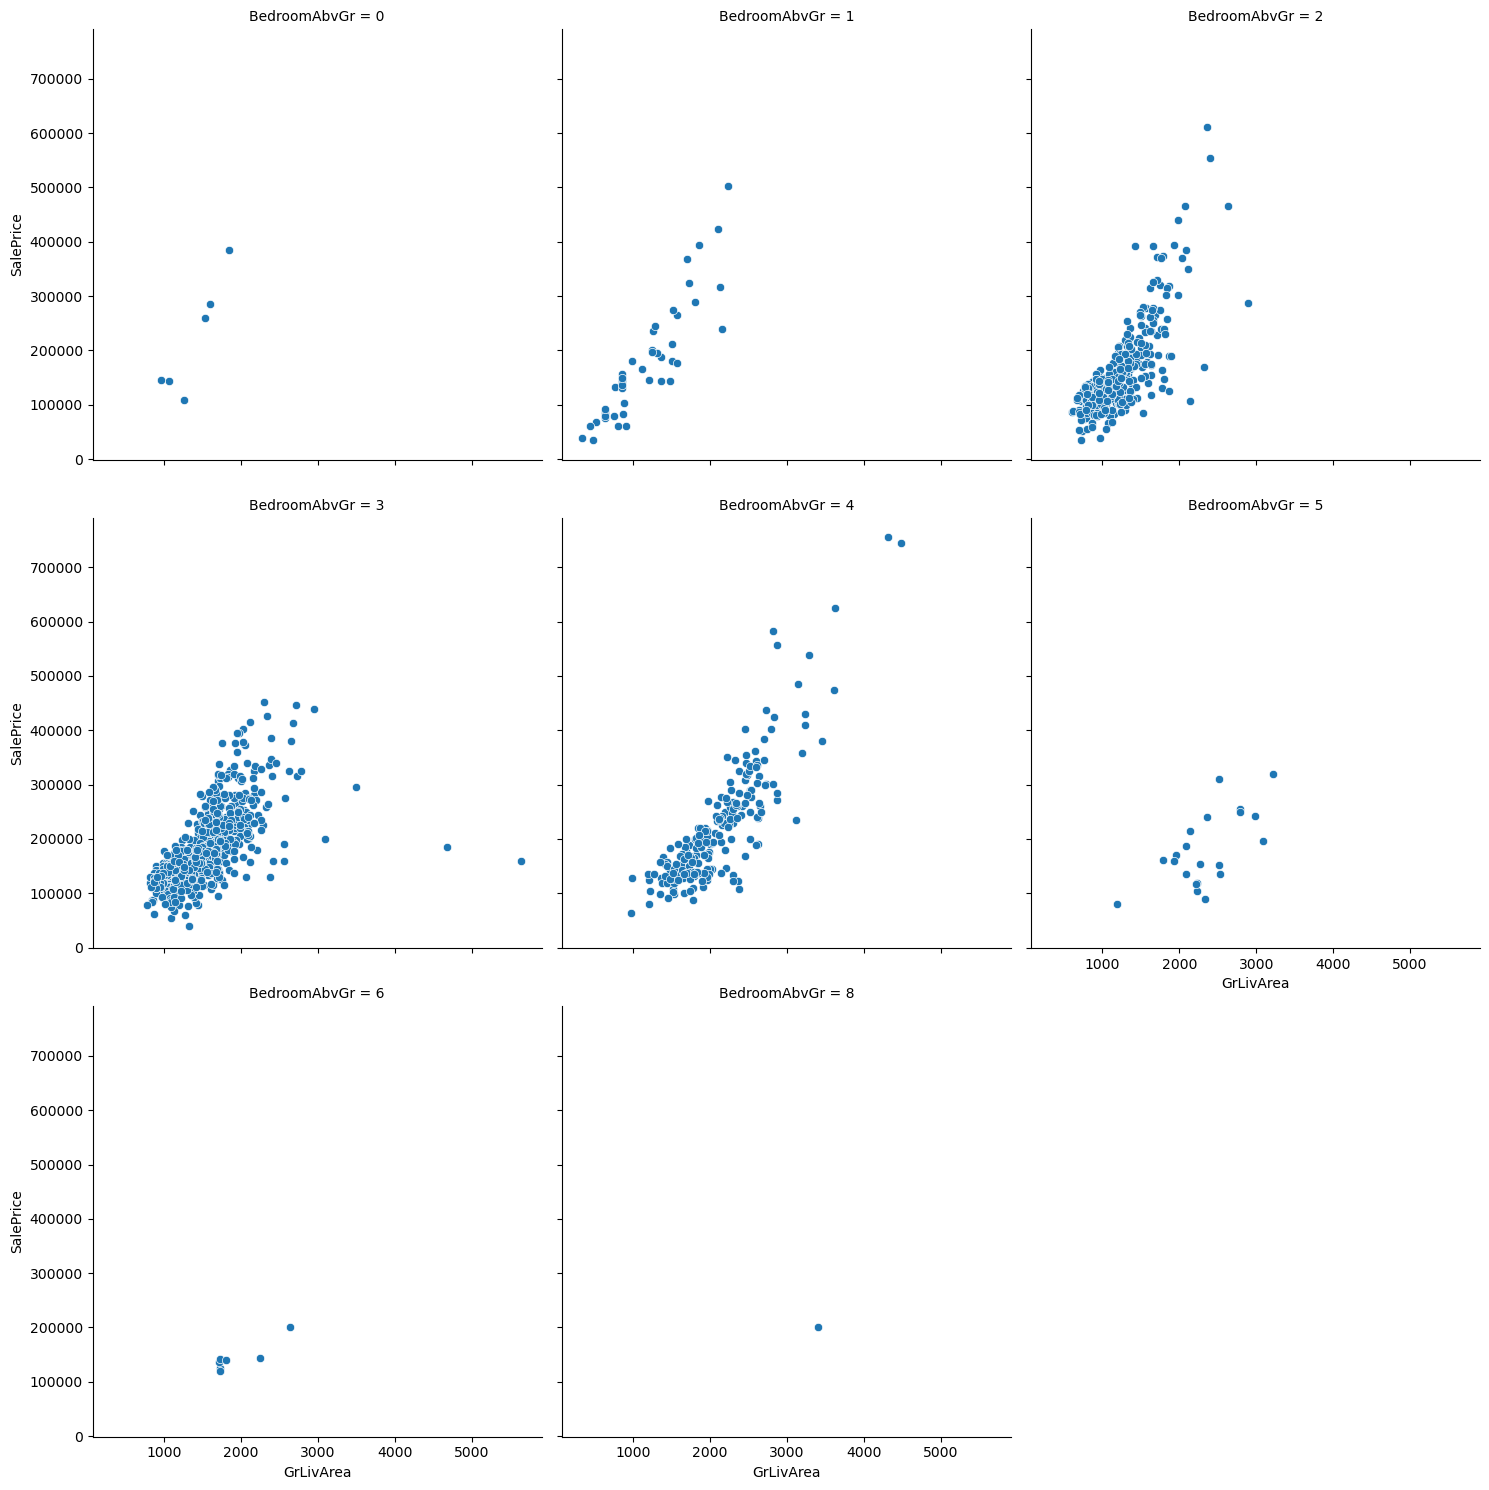

In [14]:
## Scatterplot with (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='GrLivArea', y='SalePrice', data=df_train, kind='scatter',
            col='BedroomAbvGr', col_wrap=3)
plt.show()

In [57]:
# ## Check the BoxPlot of the (BedroomAbvGr) at different Area Square Feet of (GrLivArea)
# plt.figure(figsize=(20, 10))
# sns.boxplot(x='BedroomAbvGr', data=df_train, y='GrLivArea')
# plt.title('Boxplot of Bedroom above Ground at different "Area" ', fontsize=14, c='k')
# plt.xlabel('BedroomAbvGr', fontsize=14, c='k')
# plt.ylabel('GrLivArea', fontsize=14, c='k')
# plt.show()

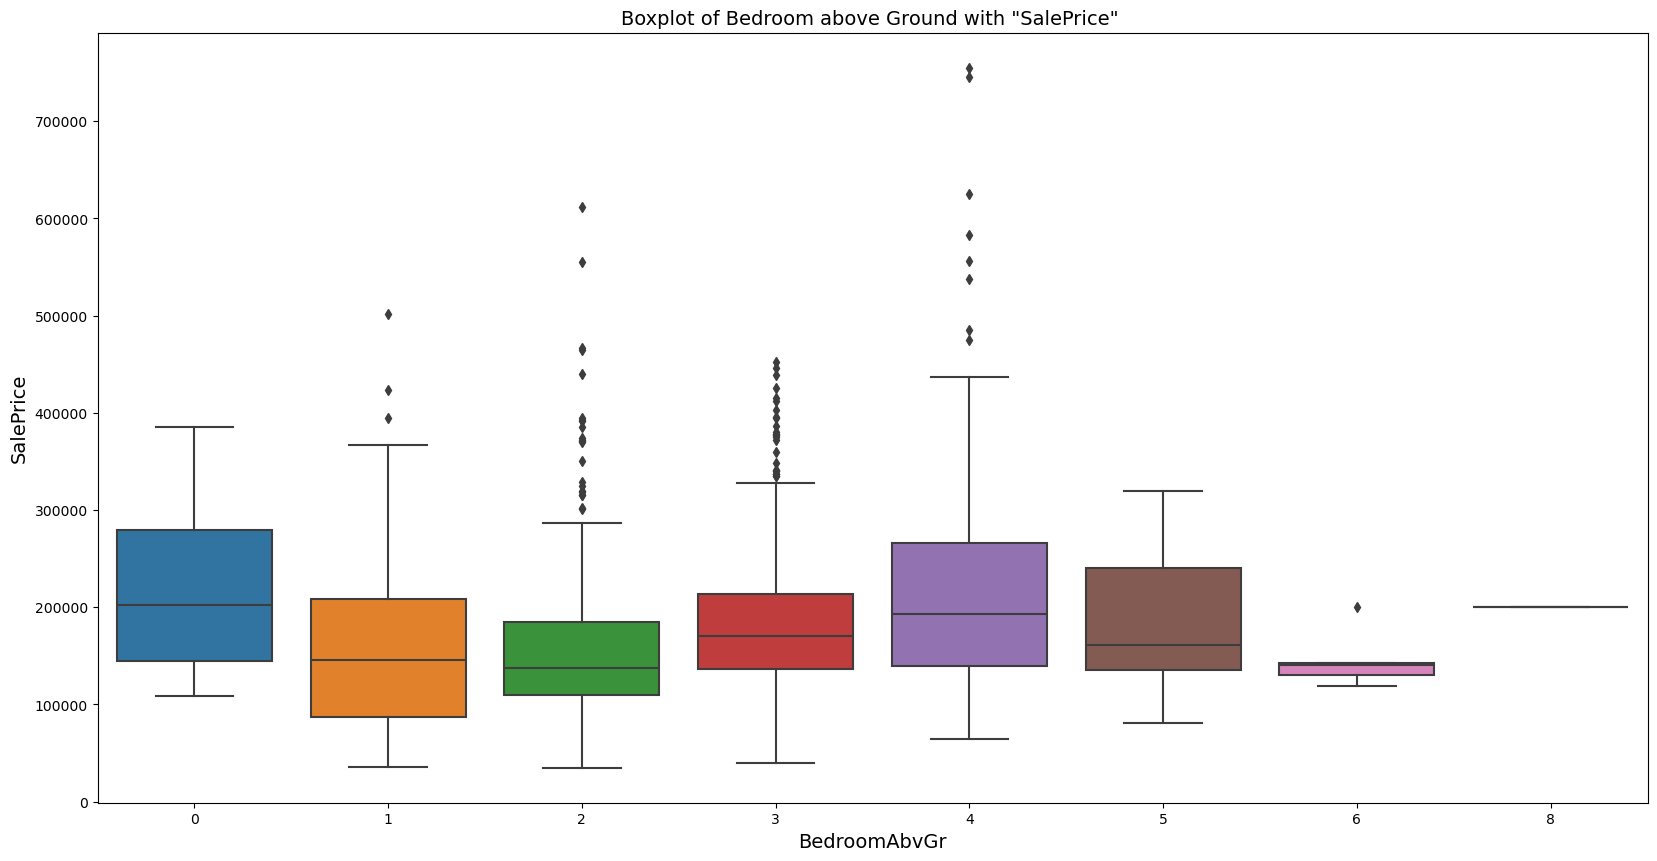

In [16]:
## Check the BoxPlot of the (BedroomAbvGr) at different Area Square Feet of (GrLivArea)
plt.figure(figsize=(20, 10))
sns.boxplot(y='SalePrice', data=df_train, x='BedroomAbvGr')
plt.title('Boxplot of Bedroom above Ground with "SalePrice" ', fontsize=14, c='k')
plt.xlabel('BedroomAbvGr', fontsize=14, c='k')
plt.ylabel('SalePrice', fontsize=14, c='k')
plt.show()

### `Multivariate Visualization`

---------

### `Check the Correlation between the Features and Target`

In [17]:
## Using pearson correlation
df_num.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

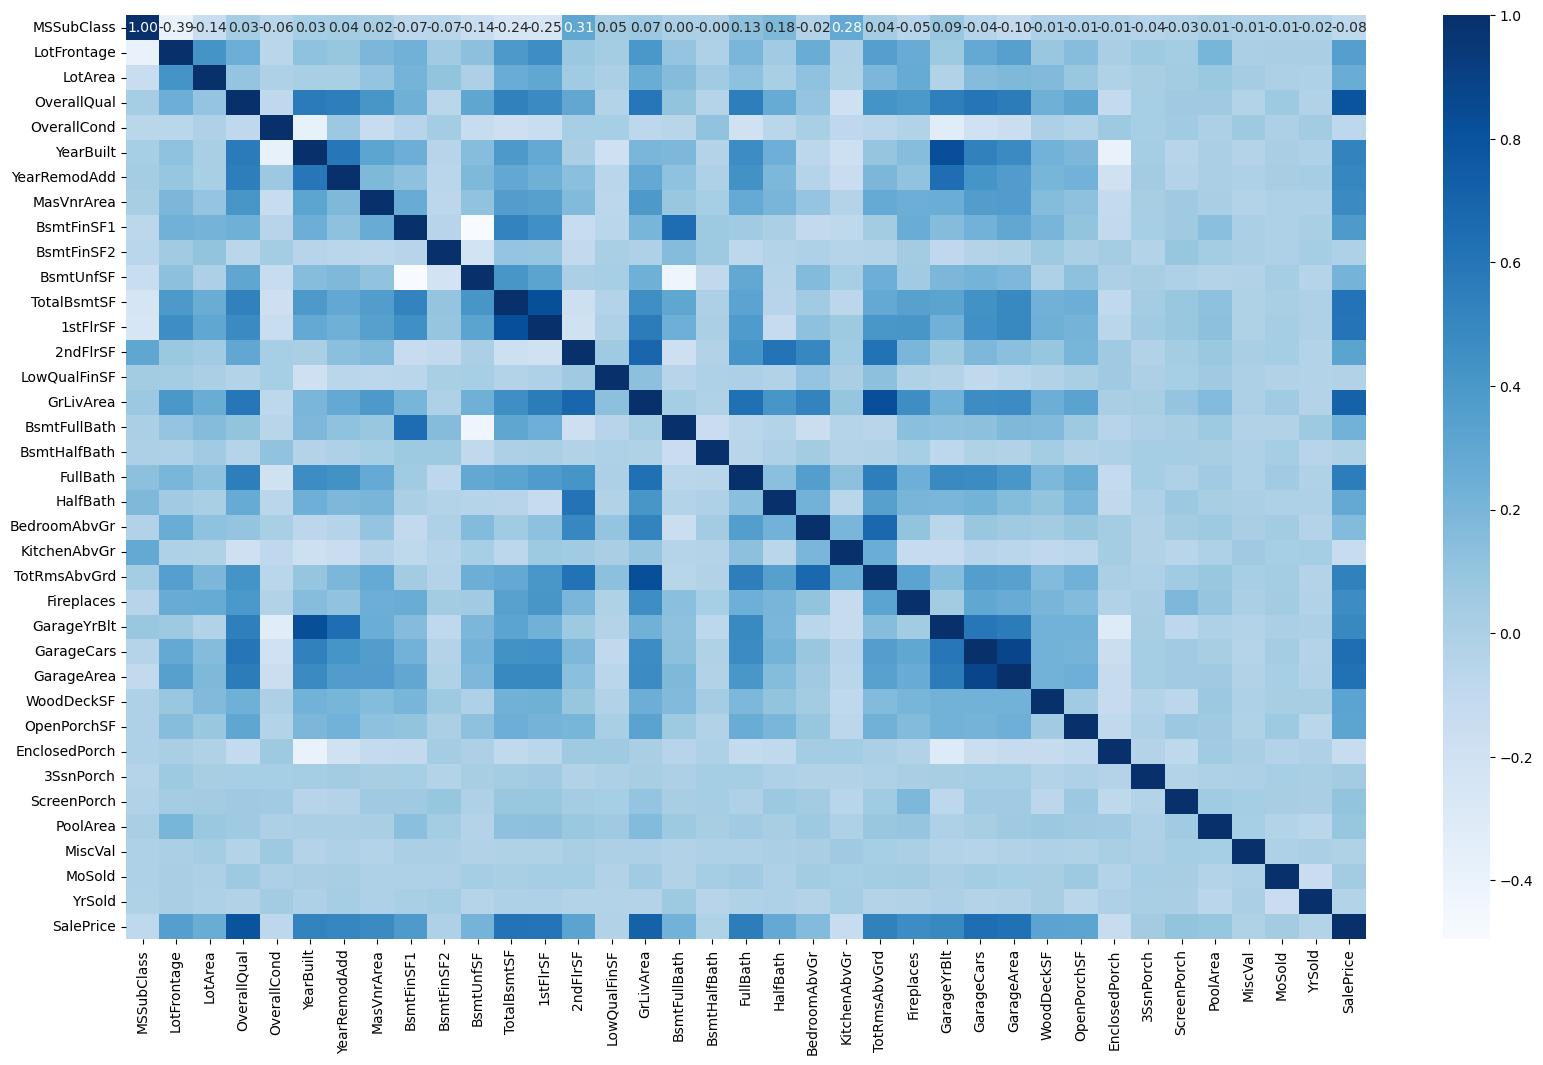

In [18]:
## you can show this as heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df_num.corr(), annot=True, cmap='Blues', fmt='.2f')  ## symmetric matrix
plt.show()

* > `Comment: It seems that the most correlated Feature with target is (GrLivArea) as I predict that, and feature like (EnclosedPorch and 
KitchenAbvGr  ) are less correlated` 

### `Feature Engineering`
``Try to add some features, thinking that it will be more useful and more correlated to the target``

In [19]:
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_num['AvBedroomArea'] = df_num['GrLivArea'] / df_num['BedroomAbvGr']
df_train['AvBedroomArea'] = df_train['GrLivArea'] / df_train['BedroomAbvGr']
# df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
# df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [20]:
## check the correlation again
df_num.corr()['SalePrice'].sort_values(ascending=False)  ## some progress for out new features (very good)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
AvBedroomArea    0.530622
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

* > `Comment:Some progress for out new feature (very good), Strong correlation, It give 0.530622`

### `Split the Dataset`
``I will split the Dataset using ordinary method (random method) not (Stratified method)``

In [21]:
## Split the whole Dataset to Feature & Target
X_train = df_train.drop(columns=['SalePrice'], axis=1)   ## Features
y_train = df_train['SalePrice']   ## target

### `Dealing with nulls`

In [22]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]


print('Numerical Columns : \n', num_cols)
print('**'*40)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AvBedroomArea']
********************************************************************************
Categorical Columns : 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heati

In [30]:
## We can get much much easier like the following
# Replace 'missing' with a more appropriate value or NaN
X_train = X_train.replace('missing', np.nan)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
# X_test = X_test.replace('missing', np.nan)
# X_test = X_test.replace([np.inf, -np.inf], np.nan)
## numerical pipeline
num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(handle_unknown='ignore', sparse=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
# X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

### `Building ML Models`

`Evaluation Metric: RMSE`

### `1. LinearRegression`

In [31]:
## LinearRegression -- Regression using Ordinary Least Squares (OLS) Method
## define the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)  ## train

LinearRegression()

In [32]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')  ## almost the same result :D

RMSE Scores Using LinearRegression --- [3.83924325e+14 8.97477937e+12 1.01354284e+14 9.41614858e+13
 4.39830332e+13]
Mean of RMSE Scores Using LinearRegression --- 126479581479222.5781
************************************************************************************************************************
RMSE after prediction Using LinearRegression --- 183603931006908.8438


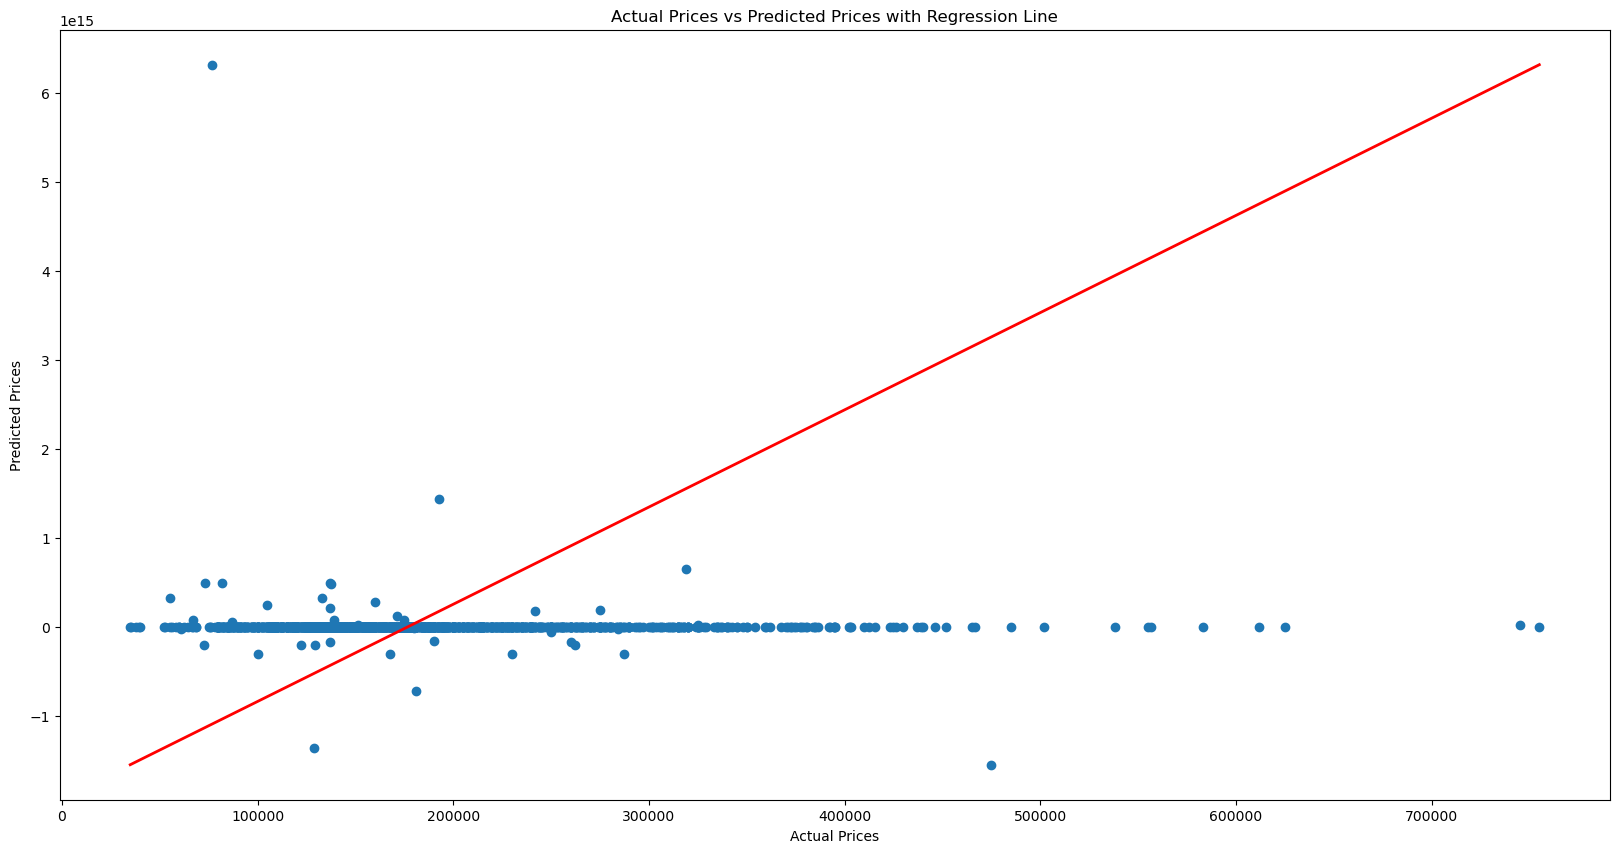

In [72]:
# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred_lin)
plt.plot([min(y_train), max(y_train)], [min(y_pred_lin), max(y_pred_lin)], color='red', linestyle='-', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices with Regression Line")
plt.show()

### `2. SGDRegressor`

In [33]:
## define the model --> ## initialize some random Hyperparameter --> we will tune later
sgd_reg = SGDRegressor(penalty='l2', alpha=0.0001, eta0=0.001, shuffle=True, max_iter=10000)  ## with Regularization
sgd_reg.fit(X_train_final, y_train)  ## train the model

SGDRegressor(eta0=0.001, max_iter=10000)

In [34]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_sgd = cross_val_score(estimator=sgd_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_sgd = -1 * rmse_scores_sgd   ## we want it positive
rmse_scores_sgd = np.sqrt(rmse_scores_sgd)
print(f'RMSE Scores Using SGDRegressor --- {np.round(rmse_scores_sgd, 4)}')
print(f'Mean of RMSE Scores Using SGDRegressor --- {rmse_scores_sgd.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_sgd = cross_val_predict(estimator=sgd_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_sgd = np.sqrt(mean_squared_error(y_train, y_pred_sgd))
print(f'RMSE after prediction Using SGDRegressor --- {rmse_pred_sgd:.4f}')  ## almost the same result :D

RMSE Scores Using SGDRegressor --- [24154.049  33322.2879 31125.5127 24531.9846 44100.6492]
Mean of RMSE Scores Using SGDRegressor --- 31446.8967
************************************************************************************************************************
RMSE after prediction Using SGDRegressor --- 32283.2845


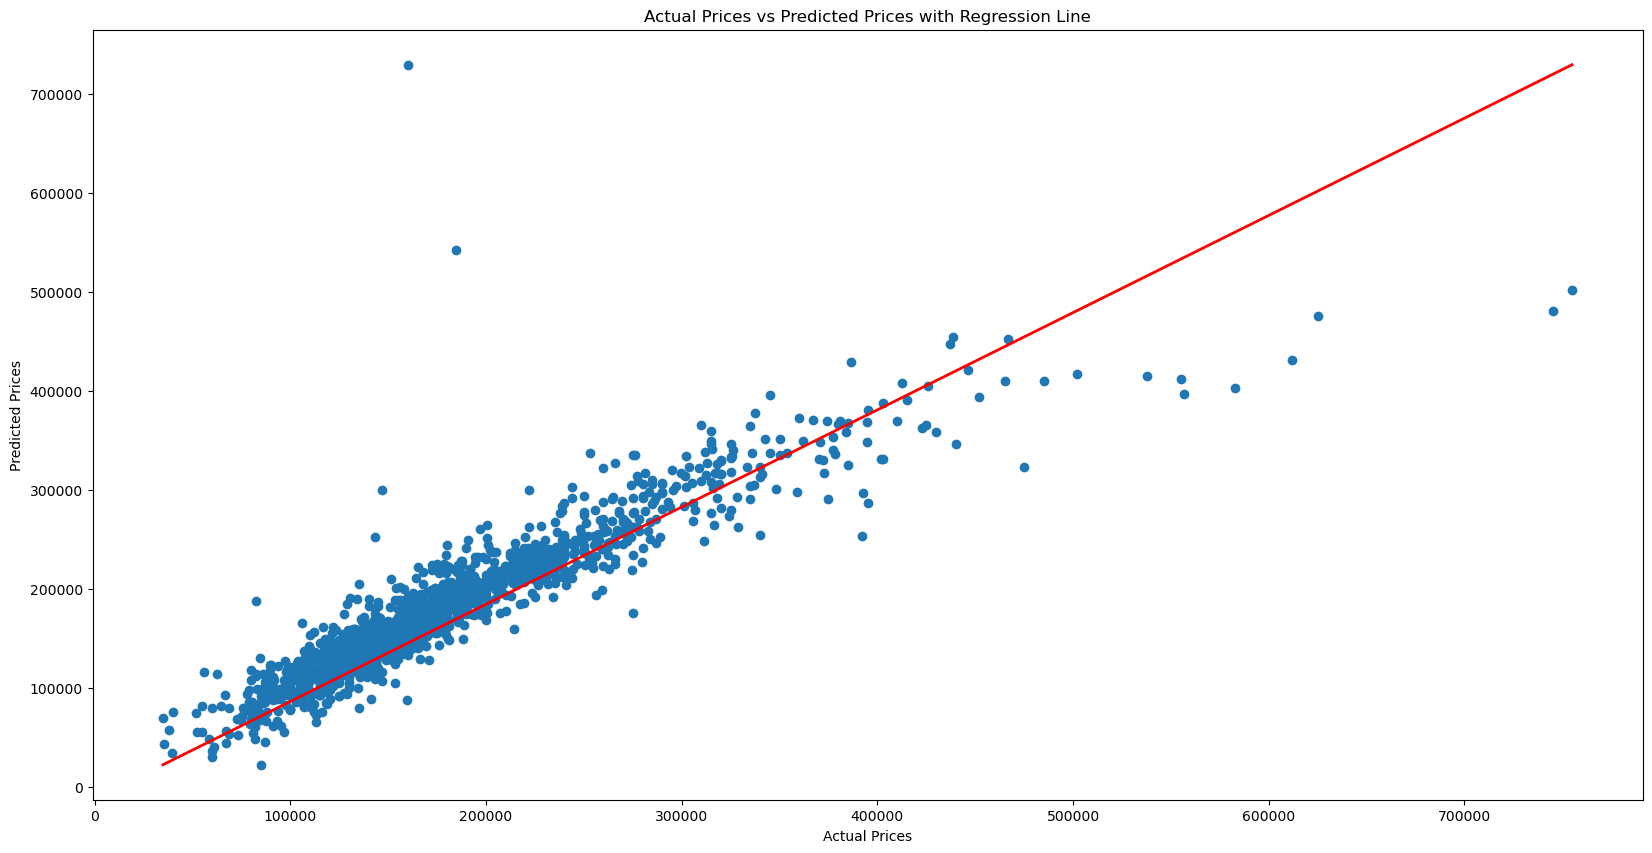

In [73]:
# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred_sgd)
plt.plot([min(y_train), max(y_train)], [min(y_pred_sgd), max(y_pred_sgd)], color='red', linestyle='-', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices with Regression Line")
plt.show()

### `3. PolynomialRegression`

In [35]:
## We can try use PolynomialRegression
poly_feat = PolynomialFeatures(degree=2, include_bias=False)   ## try random degrees, MUST be tuned
X_train_poly = poly_feat.fit_transform(X_train_final)

In [36]:
## Pass the above new poly Features to the Model -- bias is included in Model itself -- don't add it twice
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [37]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_poly = cross_val_score(estimator=lin_reg_poly, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_poly = -1 * rmse_scores_poly   ## we want it positive
rmse_scores_poly = np.sqrt(rmse_scores_poly)
print(f'RMSE Scores Using PolynomialRegression --- {np.round(rmse_scores_poly, 4)}')
print(f'Mean of RMSE Scores Using PolynomialRegression --- {rmse_scores_poly.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_poly = cross_val_predict(estimator=lin_reg_poly, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_poly = np.sqrt(mean_squared_error(y_train, y_pred_poly))
print(f'RMSE after prediction Using PolynomialRegression --- {rmse_pred_poly:.4f}')  ## almost the same result :D

RMSE Scores Using PolynomialRegression --- [3.83924325e+14 8.97477937e+12 1.01354284e+14 9.41614858e+13
 4.39830332e+13]
Mean of RMSE Scores Using PolynomialRegression --- 126479581479222.5781
************************************************************************************************************************
RMSE after prediction Using PolynomialRegression --- 183603931006908.8438


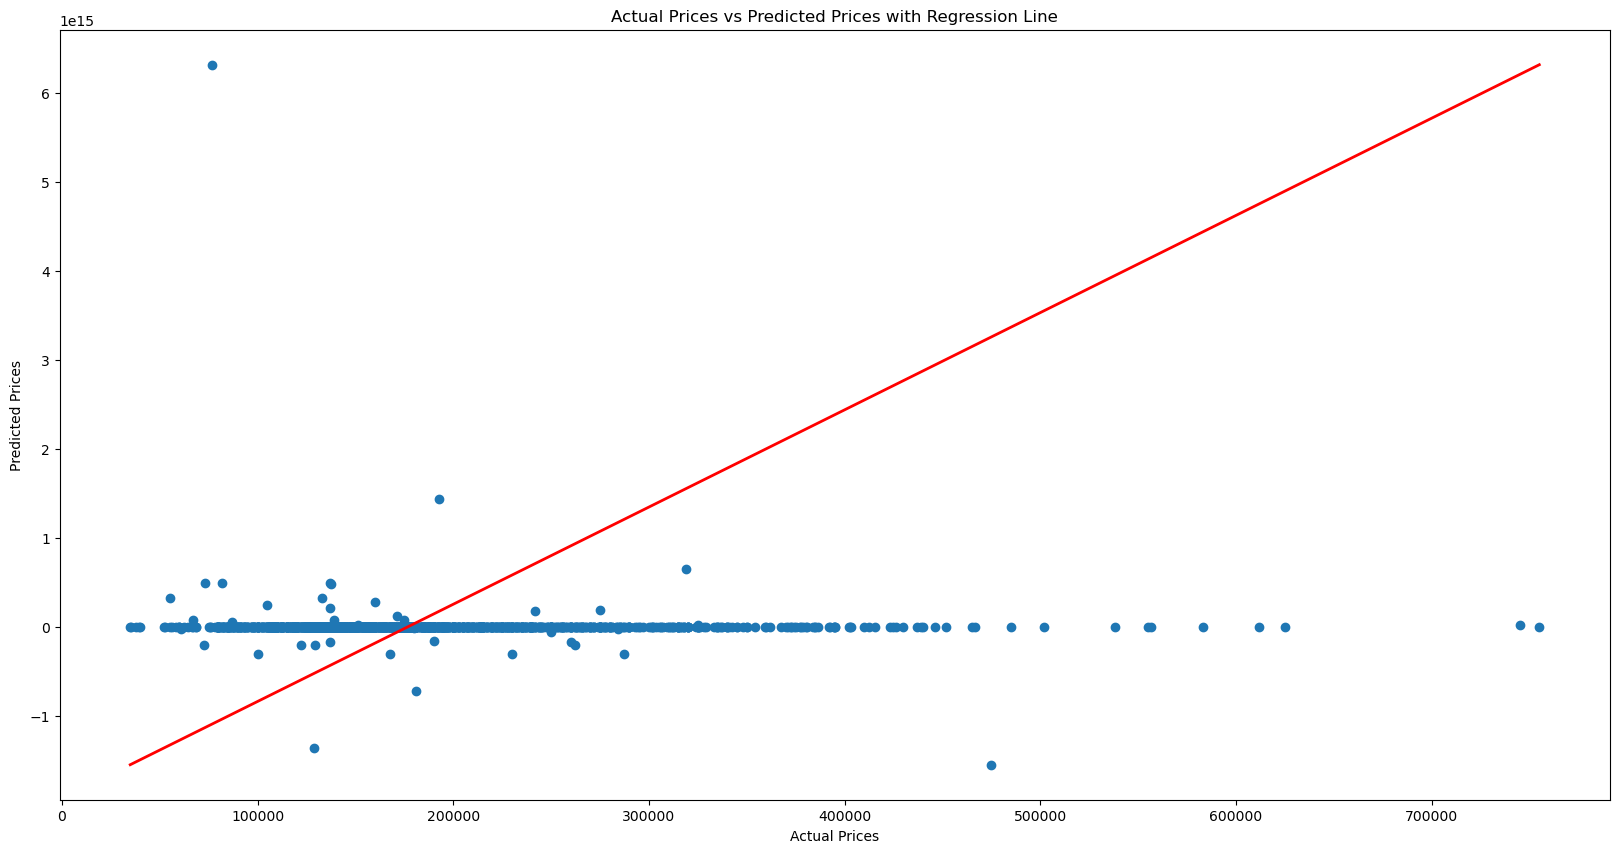

In [74]:
# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred_poly)
plt.plot([min(y_train), max(y_train)], [min(y_pred_poly), max(y_pred_poly)], color='red', linestyle='-', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices with Regression Line")
plt.show()

### `4. KNN`

In [38]:
## Using KNN, Low n_neighbors -> Overfitting &  High n_neighbors ->  Underfitting
knn_reg = KNeighborsRegressor(n_neighbors=8, p=2,  metric='minkowski', weights='uniform')
knn_reg.fit(X_train_final, y_train)  ## train the model

KNeighborsRegressor(n_neighbors=8)

In [39]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_knn = -1 * rmse_scores_knn   ## we want it positive
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}')  ## almost the same result :D

RMSE Scores Using KNN --- [34278.6144 38049.5739 40096.6211 29243.9465 44116.734 ]
Mean of RMSE Scores Using KNN --- 37157.0980
************************************************************************************************************************
RMSE after prediction Using KNN --- 37502.0723


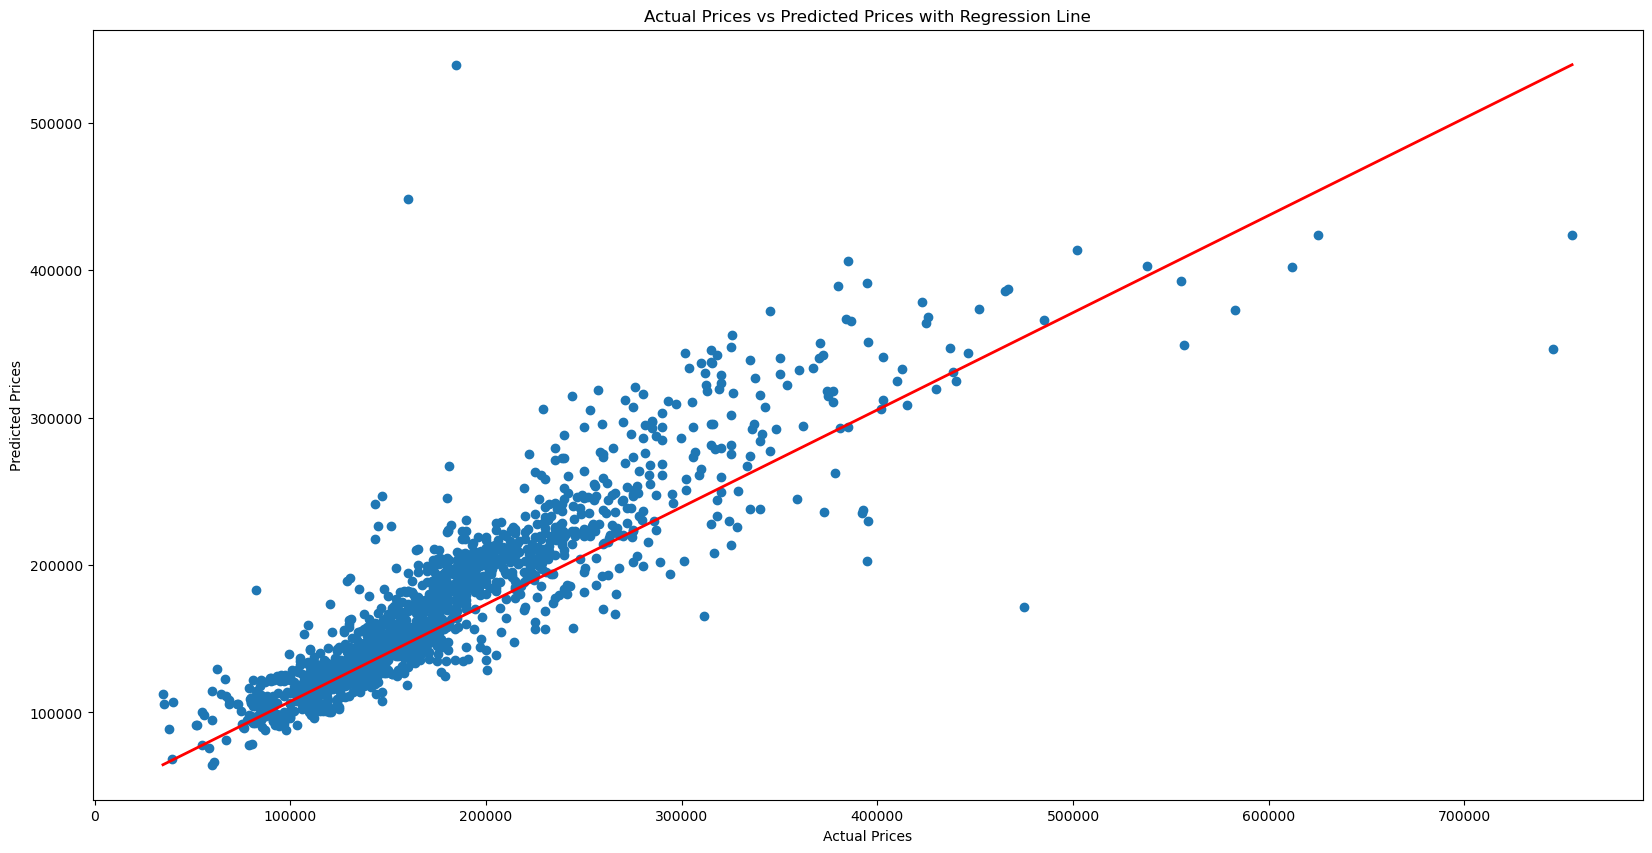

In [75]:
# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred_knn)
plt.plot([min(y_train), max(y_train)], [min(y_pred_knn), max(y_pred_knn)], color='red', linestyle='-', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices with Regression Line")
plt.show()

### `5. RandomForest`

In [40]:
## Using RF ---> A lot of Hyperparams but the Dominant (n_estimators, max_depth)
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_final, y_train)  ## train

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [41]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}')  ## almost the same result :D

RMSE Scores Using RandomForest --- [28511.6523 33070.8569 33161.8534 26540.5304 37053.4765]
Mean of RMSE Scores Using RandomForest --- 31667.6739
************************************************************************************************************************
RMSE after prediction Using RandomForest --- 31886.2487


### `RF Tuning`

In [42]:
## Using RandomizedSearchCV
params_best_forest = {'n_estimators': np.arange(100, 500, 50), 
                      'max_depth': np.arange(4, 20, 2), 
                      'max_samples': [0.7, 0.8, 0.9, 1]}

## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6, random_state=422)
search_random_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-716049216.384 total time=   0.7s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-970228059.145 total time=   0.8s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-989929467.162 total time=   0.8s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-604768567.380 total time=   0.8s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-1296229890.011 total time=   0.8s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-690069796.792 total time=   1.3s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-1004261179.278 total time=   1.4s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-973266663.295 total time=   1.3s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-621328112.313 total time=   1.4s
[CV 5/5] 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [43]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)

## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_foresr_params --  {'n_estimators': 350, 'max_samples': 0.9, 'max_depth': 14}
best_forest --  RandomForestRegressor(max_depth=14, max_samples=0.9, n_estimators=350,
                      n_jobs=-1, random_state=42)


In [44]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_forest = -1 * rmse_scores_tuned_forest   ## we want it positive
rmse_scores_tuned_forest = np.sqrt(rmse_scores_tuned_forest)
print(f'RMSE Scores Using Tuned RandomForest --- {np.round(rmse_scores_tuned_forest, 4)}')
print(f'Mean of RMSE Scores Using Tuned RandomForest --- {rmse_scores_tuned_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f'RMSE after prediction Using Tuned RandomForest --- {rmse_pred_tuned_forest:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned RandomForest --- [25929.7973 31543.1112 31203.528  24825.6191 35242.3821]
Mean of RMSE Scores Using Tuned RandomForest --- 29748.8875
************************************************************************************************************************
RMSE after prediction Using Tuned RandomForest --- 29997.7308


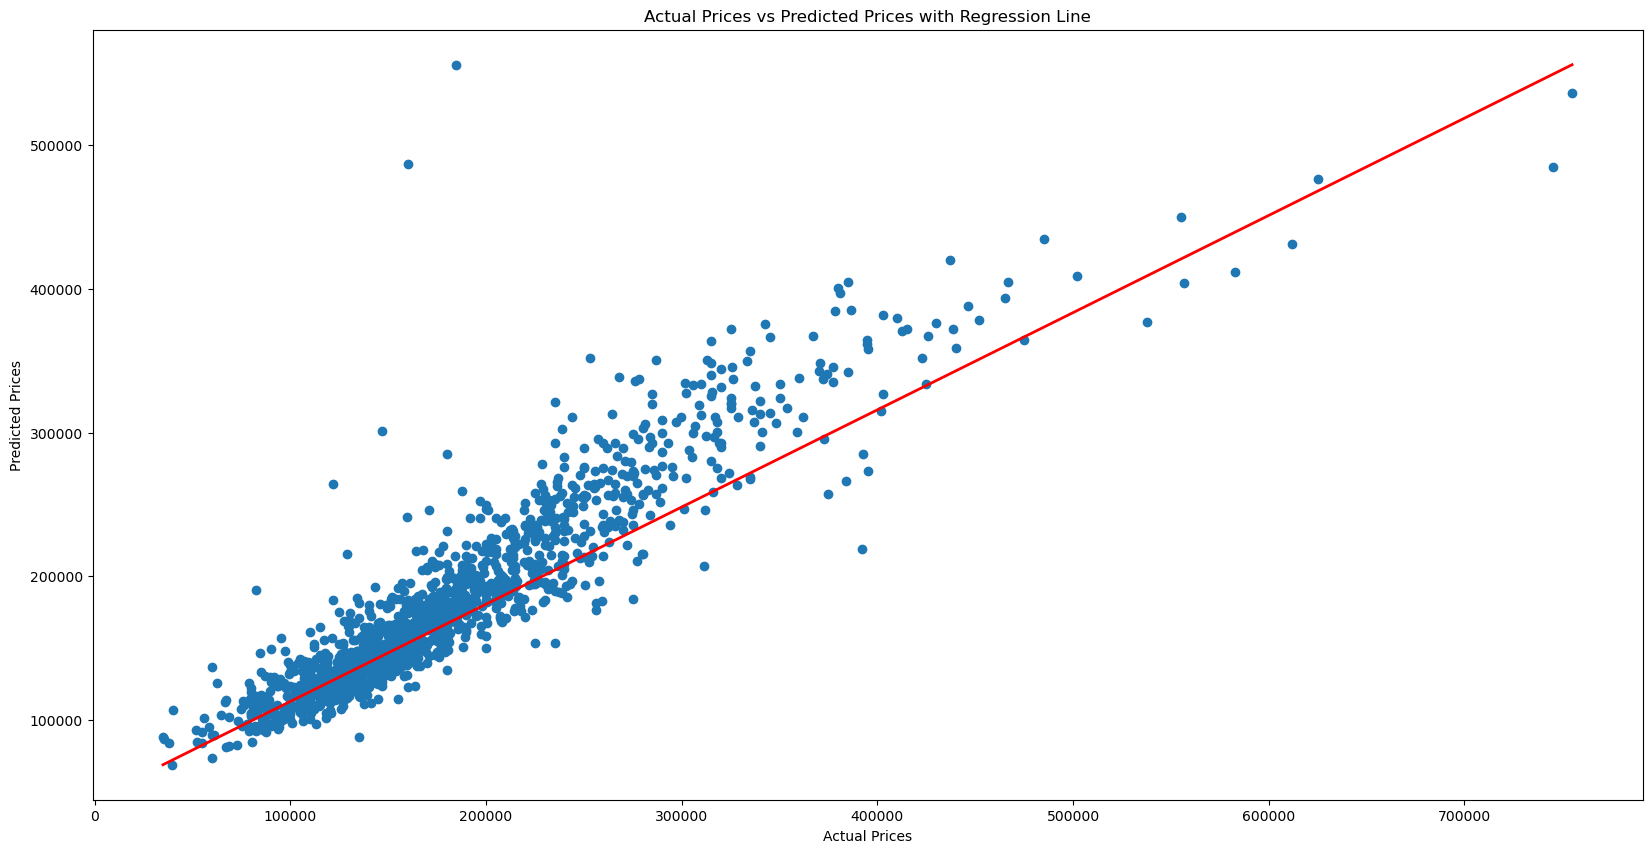

In [77]:
# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred_forest)
plt.plot([min(y_train), max(y_train)], [min(y_pred_forest), max(y_pred_forest)], color='red', linestyle='-', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices with Regression Line")
plt.show()

### `6. XGboost`

In [45]:
## Using the Hero API -- XGBOOST
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_xgb = -1 * rmse_scores_xgb   ## we want it positive
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)
print(f'RMSE Scores Using Tuned XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f'Mean of RMSE Scores Using XGBoost --- {rmse_scores_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction Using XGBoost --- {rmse_pred_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned XGBoost --- [24589.3022 29655.1526 29235.4694 21617.8152 29888.7034]
Mean of RMSE Scores Using XGBoost --- 26997.2886
************************************************************************************************************************
RMSE after prediction Using XGBoost --- 27200.8789


### `Tuning XGBoost`

In [47]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(2, 15, 2), 
                   'learning_rate': [0.1, 0.01, 0.2], 'subsample': [ 0.6, 0.7, 0.8, 0.9]}


## Intitalize the GridSearchCV and Fit ti Data
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train)  ## train

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.2],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 150]),
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [48]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
best_xgb --  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [49]:
### Finally

## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned Tuned XGBoost --- [22180.2917 30546.6509 27729.4077 19016.3762 26048.5917]
Mean of RMSE Scores Using Tuned XGBoost --- 25104.2637
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 25432.7937


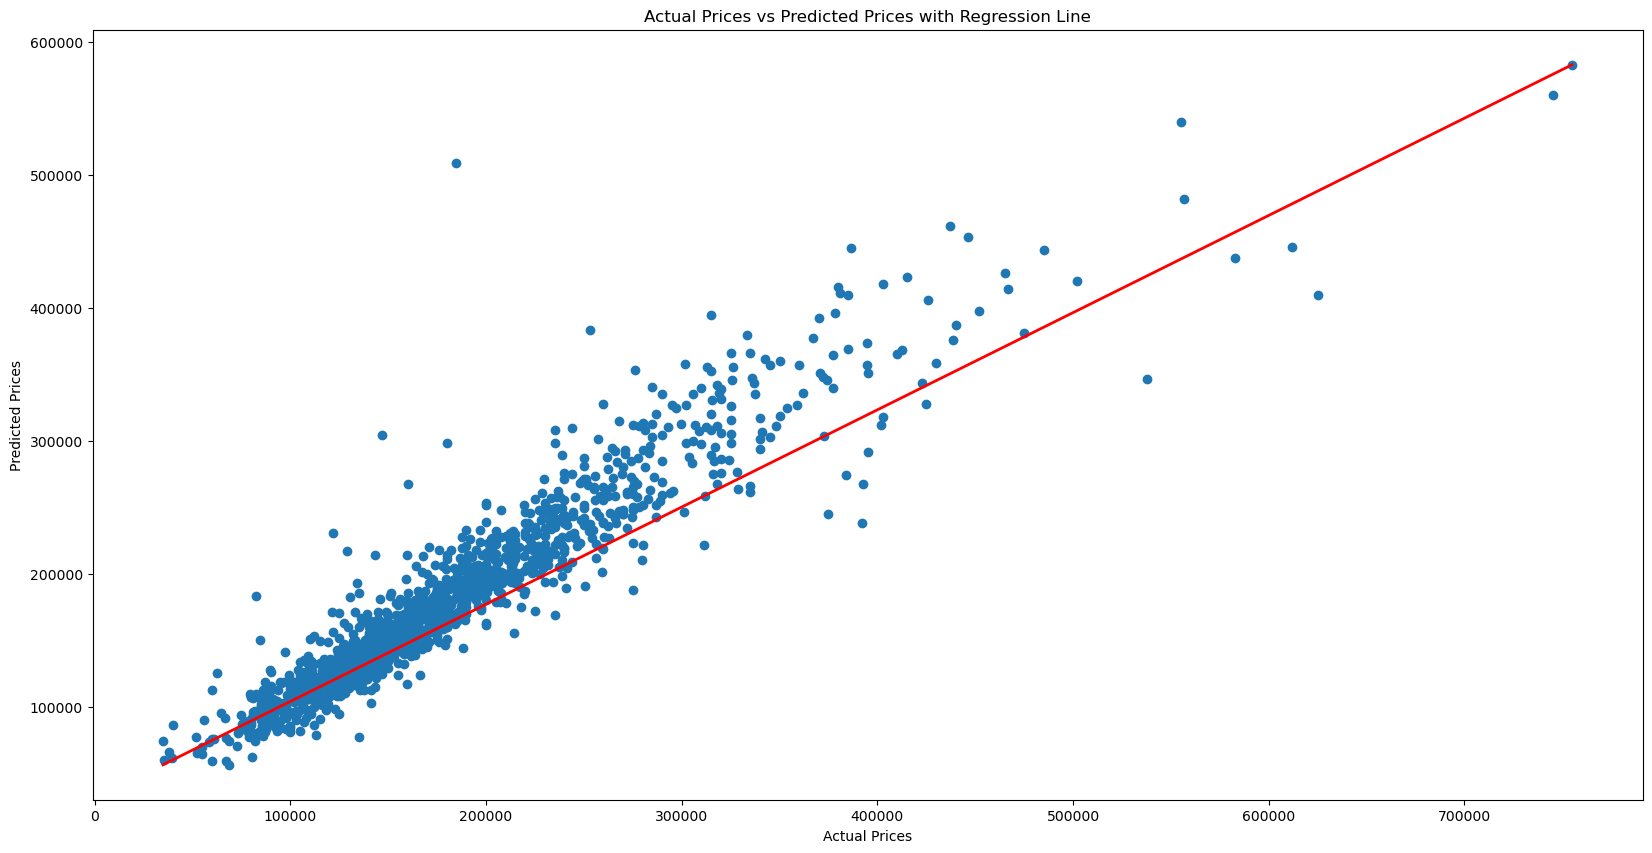

In [76]:
# Plotting
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_pred_xgb)
plt.plot([min(y_train), max(y_train)], [min(y_pred_xgb), max(y_pred_xgb)], color='red', linestyle='-', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices with Regression Line")
plt.show()

### `Models Comparison`

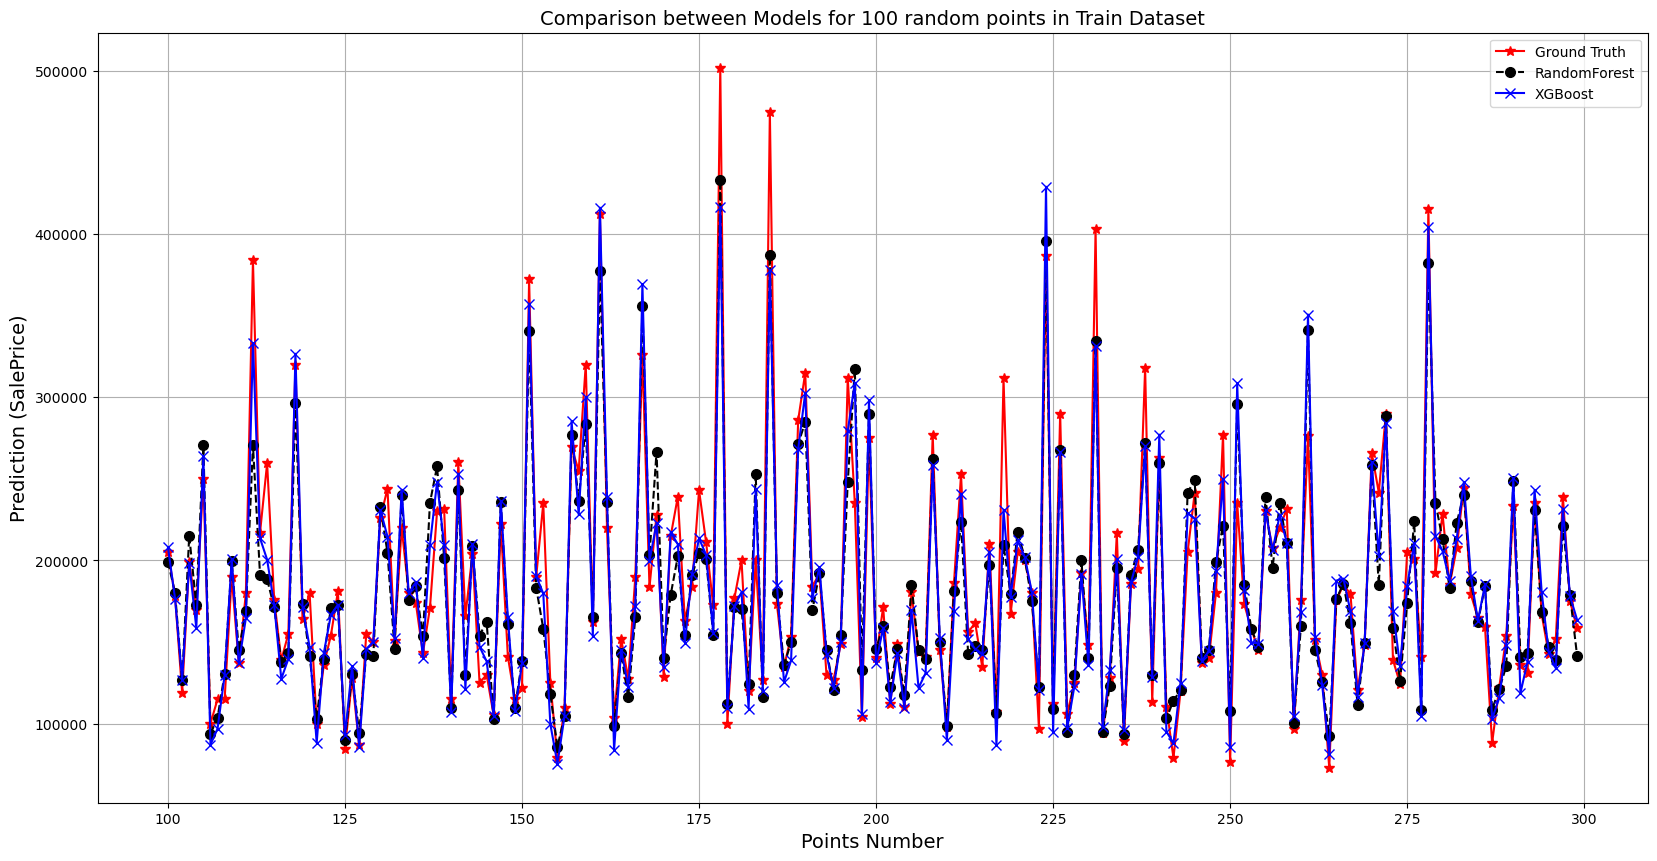

In [58]:
## Plotting
x_x = np.arange(100, 300)  ## random selected points
## Plotting
plt.figure(figsize=(20, 10))
plt.plot(x_x, y_train.values[100:300], 'r*-',  markersize=7, label='Ground Truth')  ## for train
plt.plot(x_x, y_pred_tuned_forest[100:300], 'ko--', markersize=7, label='RandomForest')
plt.plot(x_x, y_pred_tuned_xgb[100:300], 'bx-', markersize=7, label='XGBoost')
plt.title('Comparison between Models for 100 random points in Train Dataset', fontsize=14, color='k')
plt.xlabel('Points Number', fontsize=14, color='k')
plt.ylabel('Prediction (SalePrice)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()

### `Download the best Model --- best_xgb`

In [51]:
## Download using joblib
joblib.dump(best_xgb, 'model_XGBoost.pkl')

['model_XGBoost.pkl']

In [52]:
## to load this pretrained Model
loaded_model = joblib.load('model_XGBoost.pkl')
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Submission
Finally predict on the competition test data using the model.

In [56]:
#import utils
FILE_PATH_Test = os.path.join(os.getcwd(), 'test.csv')
df_test = pd.read_csv(FILE_PATH_Test)
X_test = df_test
X_test['AvBedroomArea'] = X_test['GrLivArea'] / X_test['BedroomAbvGr']
X_test = X_test.replace('missing', np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test_final = total_pipeline.transform(X_test)  
ids = df_test.pop('Id')
y_pred_test = loaded_model.predict(X_test_final)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': y_pred_test.squeeze()})

output.head()


,Id,SalePrice
0,1461,126855.796875
1,1462,159217.703125
2,1463,185138.578125
3,1464,194931.578125
4,1465,183318.953125
